# Setup

In [67]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [68]:
# loading college scorecard data from 2013-2014 because it has the most data to work with compared to more recent years
df = pd.read_csv('MERGED2013_14_PP.csv', dtype = str)


In [69]:
# setting up columns we want to look at
institution_name = 'INSTNM' #string
undergraduate_enrollment = 'UGDS' #int
avg_cost_of_attendance_academic_institutions = 'COSTT4_A' #int
#count_of_students_in_earnings_cohort = 'COUNT_ED' #int
# wne = 'working not enrolled'
count_of_students_wne_10y_after_entry = 'COUNT_WNE_P10' #int
mean_earnings_of_students_wne_10y_after_entry = 'MN_EARN_WNE_P10' #int
median_earnings_of_students_wne_10y_after_entry = 'MD_EARN_WNE_P10' #int
stddev_earnings_of_students_wne_10y_after_entry = 'SD_EARN_WNE_P10' #int

count_of_students_wne_6y_after_entry = 'COUNT_WNE_P6' #int
mean_earnings_of_students_wne_6y_after_entry = 'MN_EARN_WNE_P6' #int
median_earnings_of_students_wne_6y_after_entry = 'MD_EARN_WNE_P6' #int
stddev_earnings_of_students_wne_6y_after_entry = 'SD_EARN_WNE_P6' #int

median_debt_for_graduated_students = 'GRAD_DEBT_MDN' #float

relevantColumns = [institution_name,
                   undergraduate_enrollment, 
                   avg_cost_of_attendance_academic_institutions, 
                  count_of_students_wne_10y_after_entry,
                  mean_earnings_of_students_wne_10y_after_entry,
                  median_earnings_of_students_wne_10y_after_entry,
                  stddev_earnings_of_students_wne_10y_after_entry,
                  count_of_students_wne_6y_after_entry,
                  mean_earnings_of_students_wne_6y_after_entry,
                  median_earnings_of_students_wne_6y_after_entry,
                  stddev_earnings_of_students_wne_6y_after_entry,
                  median_debt_for_graduated_students]


# Data Cleaning

In [84]:
#df[df[field].notnull()][field]
# remove all other column data
df = df.loc[:, df.columns.intersection(relevantColumns)]

# remove specialized program institutions from the dataframe (they will have NaN for academic institution cost of attendance)
#df = df.dropna(subset=[avg_cost_of_attendance_academic_institutions])

# remove all rows that have null
df = df.dropna(how='any')

# update type for int columns
for col in relevantColumns[1:-1]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('int')

# update type for float columns
for col in relevantColumns[-1:]:
    if(df[col].dtype == object):
        # remove rows with 'PrivacySuppressed'
        df = df[df[col]!='PrivacySuppressed']
        df[col] = df[col].astype('float')

# remove schools with less than 2000 undergraduate students enrolled
df[undergraduate_enrollment] = df[undergraduate_enrollment].astype('int')
df = df[df[undergraduate_enrollment] >= 2000]


In [85]:
i = 11
#print(relevantColumns[i])
#print(df[relevantColumns[i]])
#print(df.columns)

In [ ]:
#can separate by state for bar graphs

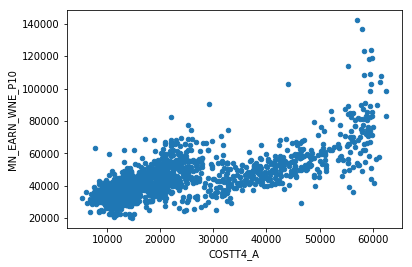

In [86]:
df.plot.scatter(x=avg_cost_of_attendance_academic_institutions,y=mean_earnings_of_students_wne_10y_after_entry)